# Task 2
## MOVIE RATING PREDICTION WITH PYTHON
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [48]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [49]:
def collect_movie_data(file_path, encodings=['utf-8', 'latin1', 'ISO-8859-1']):
    """
    Collect movie data from a CSV file or other sources.

    Parameters:
    - file_path: str, path to the CSV file containing movie data.
    - encodings: list of str, encodings to try (default is ['utf-8', 'latin1', 'ISO-8859-1']).

    Returns:
    - DataFrame containing movie data.
    """

    for encoding in encodings:
        try:
            # Load the dataset into a DataFrame
            df = pd.read_csv(file_path, encoding=encoding)

            # Ensure the dataset includes the target variable, which is the movie rating
            if 'Rating' not in df.columns:
                raise ValueError("Target variable 'Rating' is missing from the dataset.")

            return df

        except FileNotFoundError:
            print(f"Error: File {file_path} not found.")
            continue
        except Exception as e:
            print(f"An error occurred with encoding {encoding}: {str(e)}")
            continue

    print("Unable to load the dataset. Please check the file path and encoding.")
    return None

# Example usage:
file_path = r"C:\Users\Atharva\Downloads\archive\IMDb Movies India.csv"  # Raw string or properly escaped string

df = collect_movie_data(file_path)

# Check if the dataset was loaded successfully
if df is not None:
    print("Dataset loaded successfully!")
    print(df.head())


An error occurred with encoding utf-8: 'utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte
Dataset loaded successfully!
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Paleka

In [50]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [52]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

# Check for missing values

In [53]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [54]:
genre_data = df[['Genre']].copy()

genre_data.dropna(subset=['Genre'], inplace=True)

all_genres = ",".join(genre_data['Genre'].tolist())

genre_list = all_genres.split(",")

unique_genres = set(genre.strip() for genre in genre_list)

unique_genres = list(unique_genres)

print(unique_genres)

['Western', 'War', 'News', 'Animation', 'Horror', 'Mystery', 'Fantasy', 'Music', 'Reality-TV', 'Short', 'Documentary', 'Action', 'Musical', 'Romance', 'Comedy', 'History', 'Crime', 'Family', 'Sci-Fi', 'Sport', 'Thriller', 'Adventure', 'Biography', 'Drama']


In [55]:
df['Genre'] = df['Genre'].str.split(', ')
genre_data = df.explode('Genre')
genre_counts = genre_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_mean_ratings = genre_data.groupby('Genre')['Rating'].mean().reset_index()
genre_mean_ratings.columns = ['Genre', 'Mean Rating']
genre_stats = pd.merge(genre_counts, genre_mean_ratings, on='Genre')
print(genre_stats)


          Genre  Count  Mean Rating
0         Drama   7243     5.998558
1        Action   3543     5.430365
2       Romance   2449     5.750533
3        Comedy   2029     5.737290
4      Thriller   1713     5.536187
5         Crime   1322     5.727813
6        Family    943     6.195173
7       Musical    589     6.156627
8     Adventure    541     5.816839
9        Horror    524     4.785000
10      Mystery    513     5.801892
11      Fantasy    458     5.819512
12  Documentary    383     7.613287
13    Biography    208     6.819718
14      History    207     6.804688
15    Animation    125     5.956164
16        Music     90     6.137705
17        Sport     70     6.494118
18       Sci-Fi     58     5.272973
19          War     47     6.041176
20         News      9     7.250000
21      Western      5     5.566667
22   Reality-TV      3          NaN
23        Short      1          NaN


In [56]:
 df.shape

(15509, 10)

In [57]:
 df.describe(include = 'O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,[Drama],8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [58]:
data = df.dropna(subset=['Rating'])

data.reset_index(drop=True, inplace=True)

In [59]:
data.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [60]:
data.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
data['Year'] = data['Year'].str.replace(r'\D', '', regex=True).astype(int)
data['Duration'] = data['Duration'].str.replace(r'\D', '', regex=True).astype(float)
data['Votes'] = data['Votes'].str.replace(',', '', regex=True).astype(int)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_7628\1083965383.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Atharva\AppData\Local\Temp\ipykernel_7628\1083965383.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Atharva\AppData\Local\Temp\ipykernel_7628\1083965383.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [61]:
median_duration = data['Duration'].median()

# Fill missing values in the 'Duration' column with the median value
data['Duration'].fillna(median_duration, inplace=True)


C:\Users\Atharva\AppData\Local\Temp\ipykernel_7628\3201894368.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
data.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [63]:
data.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5688,5659,5688,5688,5688,5688
unique,5410,376,2438,1974,2336,2572
top,Zindagi,[Drama],David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,41,104,52,57


In [64]:
data.loc[data['Rating']==data['Rating'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4365,Love Qubool Hai,2020,94.0,"[Drama, Romance]",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [65]:
data.loc[data['Rating']==data['Rating'].min()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6238,Sadak 2,2020,133.0,"[Action, Drama]",1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


# Visualization

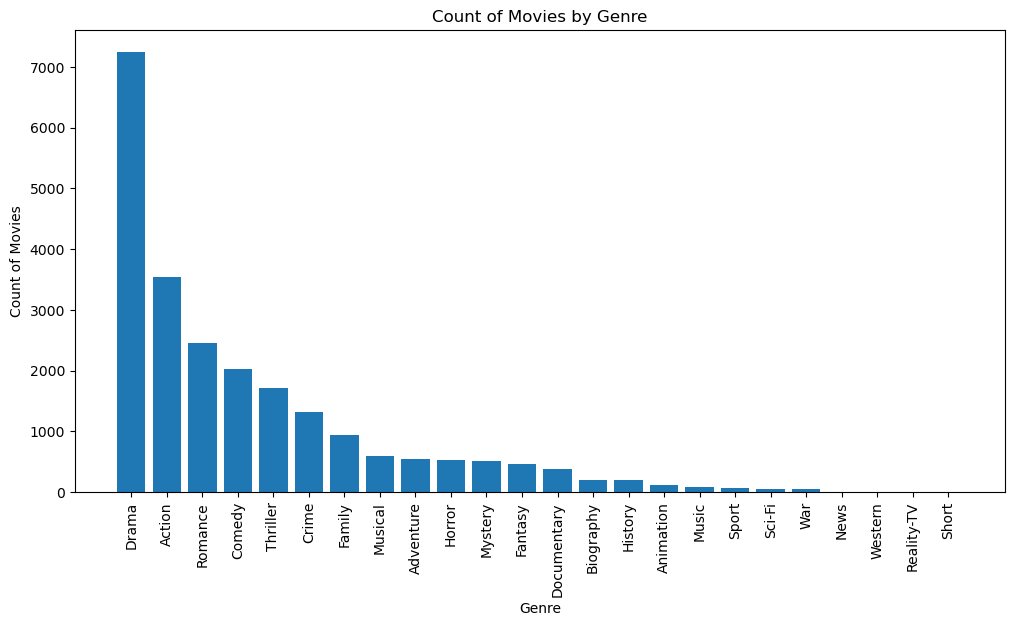

In [66]:
import matplotlib.pyplot as plt

genre_stats = genre_stats.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genre'], genre_stats['Count'])
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

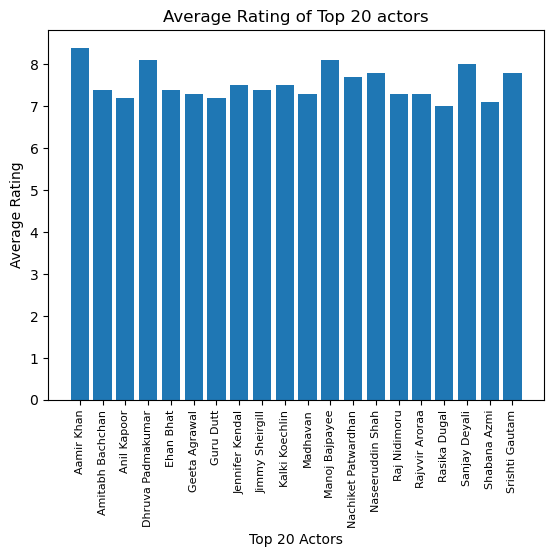

In [67]:
top_20_actor=data.groupby(data[(data['Rating']>=7)]['Actor 1'].head(20))['Rating'].mean()
plt.bar(top_20_actor.index,top_20_actor.values)
plt.xlabel("Top 20 Actors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 20 actors")
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

C:\Users\Atharva\AppData\Local\Temp\ipykernel_7628\3028027642.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



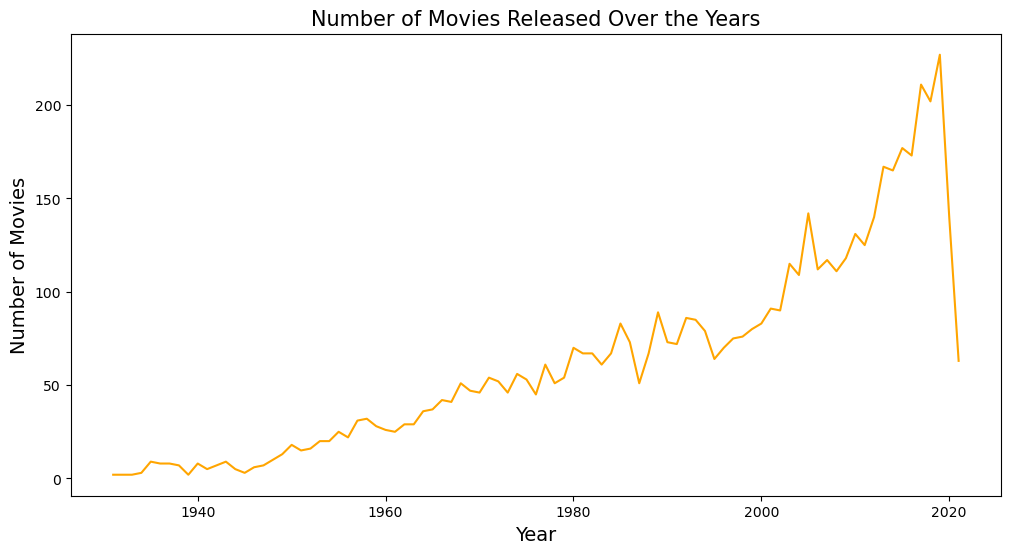

In [68]:
import plotly.express as px

# Scatter plot using Plotly Express
scatter_plot = px.scatter(data, y='Rating', x='Year', color='Rating', color_continuous_scale=px.colors.sequential.Plasma,
                          title='<b>Rating Versus Votes')

# Make sure the 'Year' column is in the correct data type (int)
data['Year'] = data['Year'].astype(int)

# Group data by year and calculate the count of movies for each year
movies_by_year = data.groupby('Year').size()

# Create a time series plot for the number of movies released over the years
plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values, color='orange')
plt.title('Number of Movies Released Over the Years', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Show both plots
plt.show()
scatter_plot.show()



# Model Selection And Dataset Traning

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [70]:

datamodel = data[['Year', 'Votes', 'Duration', 'Director','Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

In [71]:
datamodel['Director_encoded'] = datamodel.groupby('Director')['Rating'].transform('mean')
datamodel['Actor1_encoded'] = datamodel.groupby('Actor 1')['Rating'].transform('mean')
datamodel['Actor2_encoded'] = datamodel.groupby('Actor 2')['Rating'].transform('mean')
datamodel['Actor3_encoded'] = datamodel.groupby('Actor 3')['Rating'].transform('mean')


C:\Users\Atharva\AppData\Local\Temp\ipykernel_7628\2942252265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
X = datamodel[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = datamodel['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [73]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [74]:
print('Logistic Regression Model Performance: ')
print('Mean squared error:', mean_squared_error(y_test, lr_pred))
print('Mean absolute error:', mean_absolute_error(y_test, lr_pred))
print('R2 score:', r2_score(y_test, lr_pred))
print()

print('Random Forest Regressor Model Performance: ')
print('Mean squared error:', mean_squared_error(y_test, rf_pred))
print('Mean absolute error:', mean_absolute_error(y_test, rf_pred))
print('R2 score:', r2_score(y_test, rf_pred))


Logistic Regression Model Performance: 
Mean squared error: 0.377619629581683
Mean absolute error: 0.4562760312995
R2 score: 0.8033009447842608

Random Forest Regressor Model Performance: 
Mean squared error: 0.31551699355594615
Mean absolute error: 0.38918219097832474
R2 score: 0.8356497128983587


In [75]:
data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.903999999999993
